In [2]:
!pip install gower
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
# visual
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.metrics import confusion_matrix, rand_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import NuSVC



## Import Data

In [4]:
lst_str_cols = ['move']
dict_dtypes = {x: 'str' for x in lst_str_cols}
data = pd.read_csv('preprocessed_encoded_rocket_league_skillshots.csv', dtype=dict_dtypes)
df = pd.DataFrame(data = data)
df = df.drop(['Unnamed: 0'], axis = 1)

In [5]:
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,goal,Class,move
0,0.522863,0.000000,0.012304,0.498257,0.025869,0.453272,0.300277,0,5,3
1,0.525408,0.010311,0.012290,0.498257,0.018490,0.540155,0.309974,0,5,22
2,0.520195,0.012889,0.012290,0.498257,0.019278,0.540155,0.312201,0,5,18
3,0.536357,0.023200,0.012311,0.498257,0.010238,0.501020,0.342262,0,5,2
4,0.529825,0.046400,0.012387,0.498262,0.010521,0.543821,0.360175,0,5,3


In [6]:
df['move'] = df["move"].astype("int")
df['move'].dtypes

dtype('int64')

## Removing Non-Goals

In [7]:
df = df.drop(df[df['goal'] == 0].index)
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,goal,Class,move
20,0.520195,0.203651,0.013472,0.498299,0.010406,0.750275,0.492016,1,5,1
21,0.519537,0.208807,0.013510,0.498287,0.009438,0.727229,0.490791,1,5,0
44,0.520195,0.131499,0.001859,0.018411,0.119652,0.613734,0.321966,1,0,22
49,0.521101,0.180489,0.004550,0.109651,0.074178,0.840177,0.331451,1,0,21
58,0.527317,0.273304,0.009553,0.489997,0.055364,0.458214,0.459393,1,0,4


In [8]:
df = df.drop(['goal'], axis = 1)

In [9]:
df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,Class,move
20,0.520195,0.203651,0.013472,0.498299,0.010406,0.750275,0.492016,5,1
21,0.519537,0.208807,0.013510,0.498287,0.009438,0.727229,0.490791,5,0
44,0.520195,0.131499,0.001859,0.018411,0.119652,0.613734,0.321966,0,22
49,0.521101,0.180489,0.004550,0.109651,0.074178,0.840177,0.331451,0,21
58,0.527317,0.273304,0.009553,0.489997,0.055364,0.458214,0.459393,0,4


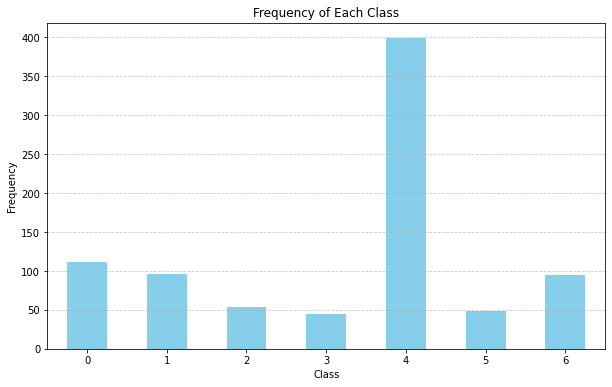

In [10]:
# Plotting the histogram of the frequency of each class including -1
plt.figure(figsize=(10, 6))
df['Class'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the class labels horizontal for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [11]:
df_no_target = df.drop(columns=['Class'])

# Classification with outliers

In [12]:
df_target = df[['Class']]
df_no_target.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,move
20,0.520195,0.203651,0.013472,0.498299,0.010406,0.750275,0.492016,1
21,0.519537,0.208807,0.013510,0.498287,0.009438,0.727229,0.490791,0
44,0.520195,0.131499,0.001859,0.018411,0.119652,0.613734,0.321966,22
49,0.521101,0.180489,0.004550,0.109651,0.074178,0.840177,0.331451,21
58,0.527317,0.273304,0.009553,0.489997,0.055364,0.458214,0.459393,4


In [13]:
# train test split data 80%-20%

X = df_no_target
y = df['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Decision Tree Classifier

### Testing parameters for DTC

In [15]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 10, 100, 300, 500, 1000],
    'min_samples_split': [1.0, 10, 100, 300, 500, 1000],
    'min_samples_leaf': [1, 10, 100, 300, 500, 1000]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3, cv=3, n_jobs = -1, error_score='raise')

# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 100, 300, 500, 1000],
                         'min_samples_leaf': [1, 10, 100, 300, 500, 1000],
                         'min_samples_split': [1.0, 10, 100, 300, 500, 1000]},
             verbose=3)

In [16]:
df_grid_dt = pd.DataFrame(grid.cv_results_)
df_grid_dt.nlargest(5, ['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,0.005311,0.000053,0.003044,0.000046,gini,1,1,500,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.471366,0.473451,0.473451,0.472756,0.000983,145
5,0.004293,0.000456,0.002832,0.000073,gini,1,1,1000,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.471366,0.473451,0.473451,0.472756,0.000983,145
10,0.003935,0.000178,0.002752,0.000028,gini,1,10,500,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.471366,0.473451,0.473451,0.472756,0.000983,145
11,0.003838,0.000011,0.002750,0.000008,gini,1,10,1000,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.471366,0.473451,0.473451,0.472756,0.000983,145
16,0.003753,0.000020,0.002689,0.000009,gini,1,100,500,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.471366,0.473451,0.473451,0.472756,0.000983,145


In [17]:
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 500, 'min_samples_leaf': 1, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=500, min_samples_split=10)


In [18]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.26      0.28      0.27        18
           1       0.67      0.76      0.71        21
           2       0.75      0.86      0.80        14
           3       0.90      0.82      0.86        11
           4       0.87      0.83      0.85        78
           5       0.88      0.70      0.78        10
           6       0.67      0.67      0.67        18

    accuracy                           0.74       170
   macro avg       0.71      0.70      0.70       170
weighted avg       0.75      0.74      0.74       170



In [19]:
cm = confusion_matrix(y_test, grid_predictions)

In [20]:
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

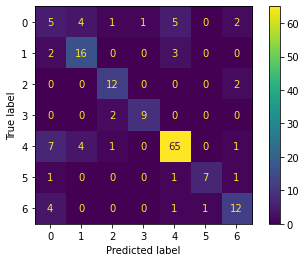

In [21]:
cm_graph.plot()
plt.show()

## Random Forest Classifier

### Testing parameters

In [22]:
### Testing parameters for RFC
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 10, 100, 1000],
    'min_samples_split': [1.0, 10, 100, 1000],
    'min_samples_leaf': [1, 10, 100, 1000]
}

In [23]:
grid = HalvingGridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=3, cv=3, n_jobs=-1, scoring='accuracy', error_score='raise')
%time grid.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 5
n_possible_iterations: 3
min_resources_: 42
max_resources_: 679
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 128
n_resources: 42
Fitting 3 folds for each of 128 candidates, totalling 384 fits
----------
iter: 1
n_candidates: 43
n_resources: 126
Fitting 3 folds for each of 43 candidates, totalling 129 fits
----------
iter: 2
n_candidates: 15
n_resources: 378
Fitting 3 folds for each of 15 candidates, totalling 45 fits
CPU times: user 2.7 s, sys: 75 ms, total: 2.77 s
Wall time: 8.67 s


HalvingGridSearchCV(cv=3, error_score='raise',
                    estimator=RandomForestClassifier(), n_jobs=-1,
                    param_grid={'criterion': ['gini', 'entropy'],
                                'max_depth': [1, 10, 100, 1000],
                                'min_samples_leaf': [1, 10, 100, 1000],
                                'min_samples_split': [1.0, 10, 100, 1000]},
                    refit=<function _refit_callable at 0x2b6837b26bf8>,
                    scoring='accuracy', verbose=3)

In [24]:
df_grid_rf = pd.DataFrame(grid.cv_results_)
df_grid_rf.nlargest(5, ['rank_test_score'])

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,42,0.169159,0.001479,0.019037,0.000253,gini,1,1,1,...,0.461538,0.461538,0.379121,0.116556,66,0.703704,0.357143,0.607143,0.555996,0.146032
2,0,42,0.193464,0.031656,0.019094,0.000259,gini,1,1,100,...,0.461538,0.461538,0.379121,0.116556,66,0.703704,0.357143,0.607143,0.555996,0.146032
3,0,42,0.184680,0.015994,0.019204,0.000263,gini,1,1,1000,...,0.461538,0.461538,0.379121,0.116556,66,0.703704,0.357143,0.607143,0.555996,0.146032
4,0,42,0.170624,0.001910,0.018965,0.000254,gini,1,10,1,...,0.461538,0.461538,0.379121,0.116556,66,0.703704,0.357143,0.607143,0.555996,0.146032
5,0,42,0.167592,0.000305,0.018746,0.000243,gini,1,10,10,...,0.461538,0.461538,0.379121,0.116556,66,0.703704,0.357143,0.607143,0.555996,0.146032


In [25]:
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 1000, 'min_samples_leaf': 1, 'min_samples_split': 10}
RandomForestClassifier(criterion='entropy', max_depth=1000,
                       min_samples_split=10)


In [26]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.37      0.39      0.38        18
           1       0.68      0.62      0.65        21
           2       0.88      0.50      0.64        14
           3       1.00      0.82      0.90        11
           4       0.85      0.94      0.89        78
           5       0.88      0.70      0.78        10
           6       0.71      0.83      0.77        18

    accuracy                           0.77       170
   macro avg       0.77      0.69      0.71       170
weighted avg       0.78      0.77      0.77       170



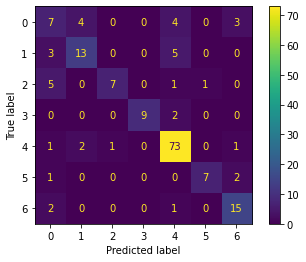

In [27]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_graph.plot()
plt.show()

## Support Vector Machine (SVM)

### Support Vector Classification (SVC)

In [28]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [29]:
grid = HalvingGridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=3, scoring='accuracy', n_jobs = -1)

%time grid.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 75
max_resources_: 679
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 75
Fitting 3 folds for each of 25 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 9
n_resources: 225
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 2
n_candidates: 3
n_resources: 675
Fitting 3 folds for each of 3 candidates, totalling 9 fits
CPU times: user 466 ms, sys: 32.8 ms, total: 499 ms
Wall time: 596 ms


HalvingGridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                    param_grid={'C': [0.1, 1, 10, 100, 1000],
                                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                'kernel': ['rbf']},
                    refit=<function _refit_callable at 0x2b6837b26bf8>,
                    scoring='accuracy', verbose=3)

In [30]:
df_grid_svc_rbf = pd.DataFrame(grid.cv_results_)
df_grid_svc_rbf.nlargest(5, ['rank_test_score'])

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
18,0,75,0.004995,0.000185,0.003013,0.000041,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",...,0.458333,0.375000,0.464444,0.075649,36,0.571429,0.50,0.46,0.510476,0.046090
23,0,75,0.004982,0.000298,0.002894,0.000100,1000,0.001,rbf,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",...,0.500000,0.333333,0.464444,0.095891,36,0.632653,0.72,0.70,0.684218,0.037365
8,0,75,0.004845,0.000171,0.003019,0.000030,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",...,0.458333,0.416667,0.465000,0.042448,32,0.489796,0.50,0.40,0.463265,0.044929
13,0,75,0.004641,0.000396,0.002952,0.000033,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",...,0.458333,0.416667,0.465000,0.042448,32,0.489796,0.50,0.46,0.483265,0.016970
19,0,75,0.004677,0.000297,0.002995,0.000029,100,0.0001,rbf,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",...,0.458333,0.416667,0.465000,0.042448,32,0.489796,0.50,0.42,0.469932,0.035552


In [31]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [32]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.35      0.39      0.37        18
           1       0.71      0.57      0.63        21
           2       0.46      0.43      0.44        14
           3       0.88      0.64      0.74        11
           4       0.84      0.92      0.88        78
           5       0.62      0.50      0.56        10
           6       0.67      0.67      0.67        18

    accuracy                           0.71       170
   macro avg       0.65      0.59      0.61       170
weighted avg       0.71      0.71      0.71       170



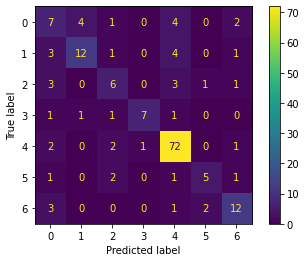

In [33]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()

In [44]:
param_grid = {'C': [50, 75, 100, 1000],
              'gamma': [5, 10, 100, 1000],
              'kernel': ['linear', 'rbf'],
              'tol' : [0.001, 0.01, 0.1],
              'decision_function_shape' : ['ovo', 'ovr']
             }

In [ ]:
grid = HalvingGridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=3, scoring='accuracy', n_jobs = -1)

%time grid.fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 5
n_possible_iterations: 3
min_resources_: 42
max_resources_: 679
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 192
n_resources: 42
Fitting 3 folds for each of 192 candidates, totalling 576 fits
----------
iter: 1
n_candidates: 64
n_resources: 126
Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [43]:
df_grid_svc_linear = pd.DataFrame(grid.cv_results_)
df_grid_svc_linear.nlargest(5, ['rank_test_score'])

AttributeError: 'HalvingGridSearchCV' object has no attribute 'cv_results_'

In [37]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 50, 'decision_function_shape': 'ovr', 'gamma': 5, 'kernel': 'linear', 'tol': 0.001}
SVC(C=50, gamma=5, kernel='linear')


In [38]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.22      0.11      0.15        18
           1       0.73      0.52      0.61        21
           2       0.50      0.29      0.36        14
           3       1.00      0.73      0.84        11
           4       0.81      0.94      0.87        78
           5       1.00      0.10      0.18        10
           6       0.44      0.94      0.60        18

    accuracy                           0.68       170
   macro avg       0.67      0.52      0.52       170
weighted avg       0.70      0.68      0.65       170



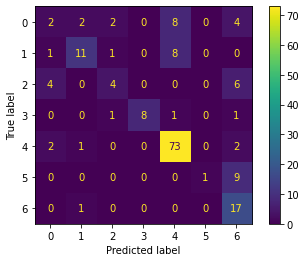

In [39]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()

### Nu-Support Vector Classification (NuSVC)

In [40]:
param_grid = {'nu': [0.1, 0.2, 0.3, 0.4],
              'gamma': ['auto', 'scale'],
              'kernel': ['rbf']}

In [41]:
grid = HalvingGridSearchCV(NuSVC(), param_grid, refit=True, verbose=3, cv=3, n_jobs=-1, scoring='accuracy')

# fitting the model for grid search 
%time grid.fit(X_train, y_train)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 226
max_resources_: 679
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 226
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.52              nan        nan        nan 0.31111111        nan
        nan        nan]
  category=UserWarning
/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the train scores are non-finite: [0.86666667        nan        nan        nan 0.33333333        nan
        nan        nan]
  category=UserWarning
/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.52              nan        nan        nan 0.31111111        nan
        nan        nan        nan        nan        nan]
  category=UserWarning
/software/python3/3.6.5/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the train scores are non-finite: [0.86666667    

----------
iter: 1
n_candidates: 3
n_resources: 678
Fitting 3 folds for each of 3 candidates, totalling 9 fits


ValueError: specified nu is infeasible

In [42]:
df_grid_nusvc_rbf = pd.DataFrame(grid.cv_results_)
df_grid_nusvc_rbf.nlargest(5, ['rank_test_score'])

AttributeError: 'HalvingGridSearchCV' object has no attribute 'cv_results_'

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

In [ ]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()

### Naive Bayes Classification

In [ ]:
param_grid = {
    'alpha' : [1, 10, 100, 1000],
}

param_grid_gaussian = {
    'priors' : [6]
}
param_grid_multi = {
    'alpha' : [.01, 0.1, 1],
    'class_prior' : [7]
}

In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(GaussianNB(), 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

grid.fit(X_train, y_train)

In [ ]:
gauss_nb_prediction = grid.predict(X_test)
print(classification_report(y_test, gauss_nb_prediction))

In [ ]:
cm = confusion_matrix(y_test, multi_nb_prediction)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()

In [ ]:
params_NB = {'alpha': [0.01,0.1, 1, 10], 
            'fit_prior' : ['True', 'False'],
            }

grid = GridSearchCV(MultinomialNB(), 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

grid.fit(X_train, y_train)

In [ ]:
grid = HalvingGridSearchCV(MultinomialNB(), param_grid_multi, verbose = 3, cv = 3, n_jobs = -1, scoring = 'accuracy')
%time grid.fit(X_train, y_train)

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

In [ ]:
df_grid_nb = pd.DataFrame(grid.cv_results_)
df_grid_nb.nlargest(5, ['rank_test_score'])

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
cm = confusion_matrix(y_test, grid_predictions)
cm_graph = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_graph.plot()
plt.show()